# I. Introduction

## 1. Domain-specific area
In this work, we present a text classifier for detecting fake news. Fake news, also known as misinformation, refers to false or misleading information presented as if it were real news. It has become a major issue in recent years, with the proliferation of social media platforms and the ease with which false information can be disseminated. The negative impact of fake news cannot be understated, as it can lead to harm to individuals and society as a whole.

To address this problem, we have developed a machine learning-based text classifier that can accurately identify fake news articles. The classifier is trained on a large dataset of real and fake news articles, and uses various features of the dataset as an input for its model.

We evaluate the performance of the classifier using f-accuracy, and show that it is able to achieve high accuracy in detecting fake news. We also discuss the potential applications of the classifier, including its use by news organizations to fact-check articles, and by social media platforms to combat the spread of fake news.

## 2. Objectives
This project aims to find a suitable way to perform text classification in news articles in order to classify if the article is or is not fake news. In order to adapt ourselves to the social media era and avoid the spread of misinformation we need to improve the ways we validate what is truth and what is not. Historically, we've seen that fake news can contribute to problems such as:
1. [Damaging the reputation of people or businesses through spreading misinformaiton.](https://www.nbcnews.com/business/business-news/fake-news-can-causeirreversible-damage-companies-sink-their-stock-n995436)
2. [Advertise false propaganda in order to misguide elections and/or election results.](https://www.ucf.edu/news/how-fake-news-affects-u-s-elections/)
3. Generate confirmation bias manipulating one's perception of reality.
4. [Estimulating conflicts in a situation where polarity is arising in society.](https://www.inverse.com/input/culture/ukraine-russia-war-pages-instagram-meme-scams)

We've also seen the widespread of fake news during COVID which, according to [studies](https://www.bbc.com/news/world-53755067), have been one of the causes of vaccine hesitancy, which has lead to unnecessary deaths all over the world.

This work consists in an automated way to fact-check news in order to tackle the problems above and many more.

## 3. Dataset

### 3.1. Description
In this work we will explore a dataset consisting of two CSV files containing classified fake and real news and we will use it to train our Machine Learning Model in order to be able to evaluate and classify other news. The language is english and the dataset consists of the following features:
1. title: The title of the news article.
2. text: The article itself.
3. subject: Examples of a subject could be: politics, middle-east and news.
4. date: The date that the article was published.
### 3.2. Dataset size
The first CSV file called 'True.csv' holding the articles categorized as not fake news consists of 21417 articles. The second one called 'Fake.csv' consists of 23481 articles.
### 3.3. Data types
All the data types are strings, except for the last column in the dataset which is a Date.
### 3.4. Source
Source: ['Fake and real news - Classifying the news'](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset) taken from kaggle.

## 4. Evaluation methodology
For the evaluation of the model the technique being used here is accuracy, since it is a simple and quick way to give a perspective of the performance in one single number and also very easy to use with the classification algorithm we are using (logistic regression). We are using numpy to calculate that based on the results of the prediction.

# II. Implementation

## 5. Preprocessing

### 5.1. Text representation
As for the text representation and lexical analysis we are using a Word2Vec model with the gensim library. The reason we decided to use this is due to the fact that it keeps information about the ordering of the words in the vector, which is going to be useful to later analyze the bigrams (words that keep appearing together) which can be informative in order to understand properties of fake news articles.
### 5.2 Pre-processing the data
As for the preprocessing and text normalization step, we are using the following techniques:
1. Tokenizing
Using nltk to separate each sentence into tokens.
2. Removing stopwords
We are also using nltk's stopwords list for the english vocabulary in order to remove words that have no meaning (such as 'is' and 'are').

### 5.3 File type format
As per the file type format, the raw data is in two CSV files, which will then be added labels and merged in order to extract the features for the classifier.

## Loading and inspect the dataset

In [201]:
# Using pandas to load the dataset

import pandas as pd
import json

fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [202]:
# Adding a label to the true and fake dataframes so we can use the classifier next

fake_df['label'] = 'False'
true_df['label'] = 'True'

# Merging the two dataframes into one (we are going to need this in order to train the model)
data = pd.concat([fake_df, true_df])
data

# Shuffling the information
data = data.sample(frac = 1)

# Since there are too much rows (44898) in this dataframe and it is too costly to do operations such as iterate through it, I am going to use a subset of it
num_data = 10000
data_copy = data.head(num_data) # This is what we are going to be using from now on
data_copy

,title,text,subject,date,label
9108,CHAIRMAN OF DEMS FOR TRUMP: My Party is Suffer...,We have to agree that the left is suffering fr...,politics,"Dec 27, 2017",False
12861,NEW YORK TIMES Publishes Trump Tax Return From...,In a lame effort to score political points fo...,politics,"Oct 2, 2016",False
11216,"Puerto Rico holding call with creditors, to tw...",NEW YORK (Reuters) - Puerto Rico is talking to...,politicsNews,"January 15, 2016",True
15398,[RAW VIDEO] WHAT JEB BUSH JUST TOLD A HISPANIC...,Bush spoke to a hispanic audience in central F...,politics,"Jul 29, 2015",False
10270,BREAKING NEWS: Vladimir Putin Retaliates After...,Here s a question for the anti-Trump media: If...,politics,"Jul 30, 2017",False
...,...,...,...,...,...
18560,WHY IT’S GOOD NEWS For Conservatives That Bitt...,"As a Wellesley graduate, I was shocked and dis...",left-news,"May 30, 2017",False
15317,New U.S. government rules restrict travel and ...,WASHINGTON/HAVANA (Reuters) - The U.S. governm...,worldnews,"November 8, 2017",True
15095,Indonesia warns of tough response after Papuan...,JAKARTA (Reuters) - Indonesia s military said ...,worldnews,"November 10, 2017",True
12800,Tillerson to meet Lebanon's Hariri in Paris on...,WASHINGTON (Reuters) - U.S. Secretary of State...,worldnews,"December 8, 2017",True


### Exploratory data analysis

In [203]:
# Printing the unique subjects in the dataset
print("Subjects: ", data_copy.subject.unique())

Subjects:  ['politics' 'politicsNews' 'worldnews' 'left-news' 'US_News' 'News'
 'Government News' 'Middle-east']


In [204]:
# Printing the different columns
print("Columns:", data_copy.columns)

Columns: Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


## Preprocessing the dataset

In [205]:
# Defining the preprocess method
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords

# Preprocess the sentences
def preprocess(sentences):
    # Tokenize the sentences: transforming the whole string into a list of tokens. We need this for the Word2Vec model and for the classifier model
    sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    # Lowercase the words
    sentences = [[word.lower() for word in sentence] for sentence in sentences]
    # Removing stopwords
    stop_words = stopwords.words('english')
    sentences = [word for word in sentences if not word in stop_words]
    
    return sentences

In [206]:
# Here we are creating a new column in the dataframe called 'clean_text' and adding the results of the preprocess method

sentences = data_copy['text']
sentences = preprocess(sentences)

data_copy['clean_text'] = sentences;
data_copy.head(10)

/var/folders/65/v6ssklls6x5dnvkx1dq1vnjh0000gp/T/ipykernel_8404/3211253336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['clean_text'] = sentences;


,title,text,subject,date,label,clean_text
9108,CHAIRMAN OF DEMS FOR TRUMP: My Party is Suffer...,We have to agree that the left is suffering fr...,politics,"Dec 27, 2017",False,"[we, have, to, agree, that, the, left, is, suf..."
12861,NEW YORK TIMES Publishes Trump Tax Return From...,In a lame effort to score political points fo...,politics,"Oct 2, 2016",False,"[in, a, lame, effort, to, score, political, po..."
11216,"Puerto Rico holding call with creditors, to tw...",NEW YORK (Reuters) - Puerto Rico is talking to...,politicsNews,"January 15, 2016",True,"[new, york, (, reuters, ), -, puerto, rico, is..."
15398,[RAW VIDEO] WHAT JEB BUSH JUST TOLD A HISPANIC...,Bush spoke to a hispanic audience in central F...,politics,"Jul 29, 2015",False,"[bush, spoke, to, a, hispanic, audience, in, c..."
10270,BREAKING NEWS: Vladimir Putin Retaliates After...,Here s a question for the anti-Trump media: If...,politics,"Jul 30, 2017",False,"[here, s, a, question, for, the, anti-trump, m..."
7875,Trump to Ryan: Do not waste time fighting Repu...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"October 10, 2016",True,"[washington, (, reuters, ), -, republican, pre..."
4265,Senator Warren aide said to be in running for ...,WASHINGTON/BOSTON (Reuters) - Bharat R. Ramamu...,politicsNews,"April 12, 2017",True,"[washington/boston, (, reuters, ), -, bharat, ..."
17269,'Vanishing village' looks to Japan's LDP for s...,"NANMOKU, Japan (Reuters) - Chikara Imai, 73, i...",worldnews,"October 17, 2017",True,"[nanmoku, ,, japan, (, reuters, ), -, chikara,..."
17745,HILARIOUS! Paul Joseph Watson DESTROYS Media F...,Paul Joseph Watson nails it again. In the vide...,left-news,"Oct 27, 2017",False,"[paul, joseph, watson, nails, it, again, ., in..."
7439,Trump election puts Iran nuclear deal on shaky...,WASHINGTON (Reuters) - Donald Trump’s election...,politicsNews,"November 9, 2016",True,"[washington, (, reuters, ), -, donald, trump, ..."


## Lexical Analysis

For the lexical analysis we used Word2vec model and gensim's Phrases library to create a vocabulary of bigrams. We started by preprocessing the articles in the fake dataframe, we then used this as an input to create the bigrams and the word2vec model. 

### Word2vec model
As for the word2vec model, by inspecting it we can see it has some interesting features:
- Model length:  80658
- Model dimensions: 100
- Model number of words 80658
We tested it by calling similarity and some words of the vocabulary and the results have a high accuracy. Check example below.

### Plotting a graph with the vocabulary of the Word3Vec model¶
After training the model we used matplotlib to plot the vocabulary of the model in a three-dimensional grid. For that we needed to use a Principal Component Analysis optimization (PCA) algorithm to speed up our model for generating a new data structure with the positional value of each word in the x, y, z position in order to fit them into the grid. We had to do it this way because the dimensions of the dataset we are working here are too high.

### Text representation: Word2Vec

In [215]:
# Using gensim's phrases to find bigrams
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

fake_sentences = preprocess(fake_df.text.values)

# Creating the model based on the sentences we have in the dataframe
bigrams = Phrases(fake_sentences)
word2vec_model = Word2Vec(bigrams[fake_sentences], min_count=3)

In [216]:
# Now let us analyze some bigrams in the fake news articles: the bigrams will be shown as a pair firstWord_secondWord
test_articles = data_copy.clean_text.values

data_copy['bigrams'] = bigrams[test_articles];
data_copy.head(10)

/var/folders/65/v6ssklls6x5dnvkx1dq1vnjh0000gp/T/ipykernel_8404/261825028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['bigrams'] = bigrams[test_articles];


,title,text,subject,date,label,clean_text,bigrams
9108,CHAIRMAN OF DEMS FOR TRUMP: My Party is Suffer...,We have to agree that the left is suffering fr...,politics,"Dec 27, 2017",False,"[we, have, to, agree, that, the, left, is, suf...","[we, have, to, agree, that, the, left, is, suf..."
12861,NEW YORK TIMES Publishes Trump Tax Return From...,In a lame effort to score political points fo...,politics,"Oct 2, 2016",False,"[in, a, lame, effort, to, score, political, po...","[in, a, lame, effort, to, score_political, poi..."
11216,"Puerto Rico holding call with creditors, to tw...",NEW YORK (Reuters) - Puerto Rico is talking to...,politicsNews,"January 15, 2016",True,"[new, york, (, reuters, ), -, puerto, rico, is...","[new_york, (, reuters, ), -, puerto_rico, is, ..."
15398,[RAW VIDEO] WHAT JEB BUSH JUST TOLD A HISPANIC...,Bush spoke to a hispanic audience in central F...,politics,"Jul 29, 2015",False,"[bush, spoke, to, a, hispanic, audience, in, c...","[bush, spoke, to, a, hispanic, audience, in, c..."
10270,BREAKING NEWS: Vladimir Putin Retaliates After...,Here s a question for the anti-Trump media: If...,politics,"Jul 30, 2017",False,"[here, s, a, question, for, the, anti-trump, m...","[here, s, a, question, for, the, anti-trump, m..."
7875,Trump to Ryan: Do not waste time fighting Repu...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"October 10, 2016",True,"[washington, (, reuters, ), -, republican, pre...","[washington, (, reuters, ), -, republican_pres..."
4265,Senator Warren aide said to be in running for ...,WASHINGTON/BOSTON (Reuters) - Bharat R. Ramamu...,politicsNews,"April 12, 2017",True,"[washington/boston, (, reuters, ), -, bharat, ...","[washington/boston, (, reuters, ), -, bharat, ..."
17269,'Vanishing village' looks to Japan's LDP for s...,"NANMOKU, Japan (Reuters) - Chikara Imai, 73, i...",worldnews,"October 17, 2017",True,"[nanmoku, ,, japan, (, reuters, ), -, chikara,...","[nanmoku, ,, japan, (, reuters, ), -, chikara,..."
17745,HILARIOUS! Paul Joseph Watson DESTROYS Media F...,Paul Joseph Watson nails it again. In the vide...,left-news,"Oct 27, 2017",False,"[paul, joseph, watson, nails, it, again, ., in...","[paul_joseph, watson, nails_it, again, ., in, ..."
7439,Trump election puts Iran nuclear deal on shaky...,WASHINGTON (Reuters) - Donald Trump’s election...,politicsNews,"November 9, 2016",True,"[washington, (, reuters, ), -, donald, trump, ...","[washington, (, reuters, ), -, donald_trump, ’..."


In [209]:
# Inspecting the fake lexicalmodel: I am going to get the word 'nation' in the list above and check for similarities

# Length of the model:
print("Model length: ", len(word2vec_model.wv.key_to_index))

# how many dimensions?
print("Model dimensions:", len(word2vec_model.wv['nation']))

# How many words in the model?
words = list(word2vec_model.wv.key_to_index)
print("Model number of words", len(words))

# Finding similar terms
word2vec_model.wv.most_similar('nation', topn=20)

Model length:  80658
Model dimensions: 100
Model number of words 80658


[('country', 0.8448327779769897),
 ('america', 0.7544978857040405),
 ('our_nation', 0.7383241653442383),
 ('world', 0.7174632549285889),
 ('eu', 0.6690049171447754),
 ('our_country', 0.6643893718719482),
 ('democracy', 0.6319657564163208),
 ('europe', 0.6222034096717834),
 ('britain', 0.6145777106285095),
 ('society', 0.609611451625824),
 ('globe', 0.5923258066177368),
 ('generation', 0.5894155502319336),
 ('culture', 0.5885983109474182),
 ('middle_east', 0.5760666131973267),
 ('region', 0.567994236946106),
 ('continent', 0.5650137066841125),
 ('united_states', 0.5637699961662292),
 ('future', 0.5635557174682617),
 ('civil_war', 0.5629743933677673),
 ('west', 0.5547658205032349)]

## Plotting a graph with the vocabulary of the Word3Vec model

In [210]:
import string
from gensim.models import phrases, word2vec
from sklearn.decomposition import PCA

# We need to now find the vector representing each word, we can do this like so
X = word2vec_model.wv[words]

# Since our dataset dimensions are too high (45606),,we are going to be using Principal Component Analysis (PCA) to speed up the model training for 
# our Data Visualization
pca = PCA(n_components=3, random_state=11, whiten=True)
clf = pca.fit_transform(X)

# Creating a new dataframe with the model fit in order to visualize it afterwards
tmp = pd.DataFrame(clf, index=words, columns=['x', 'y', 'z'])

tmp.head(10)

,x,y,z
the,-5.321537,3.349342,2.914190
",",-1.578094,2.185891,3.523846
.,-5.440238,-0.977095,5.763877
to,-8.593275,0.498796,2.257483
of,-4.312143,2.879751,0.362549
and,-4.970900,0.787323,-0.129419
a,-3.453165,0.399685,3.711100
in,-3.603378,3.888028,1.568579
that,-8.159046,0.476614,5.594429
s,-2.498318,-2.010441,4.965305


In [221]:
# Picking up a smalle sample to put in the grid
from collections import Counter

sample = tmp.sample(100)

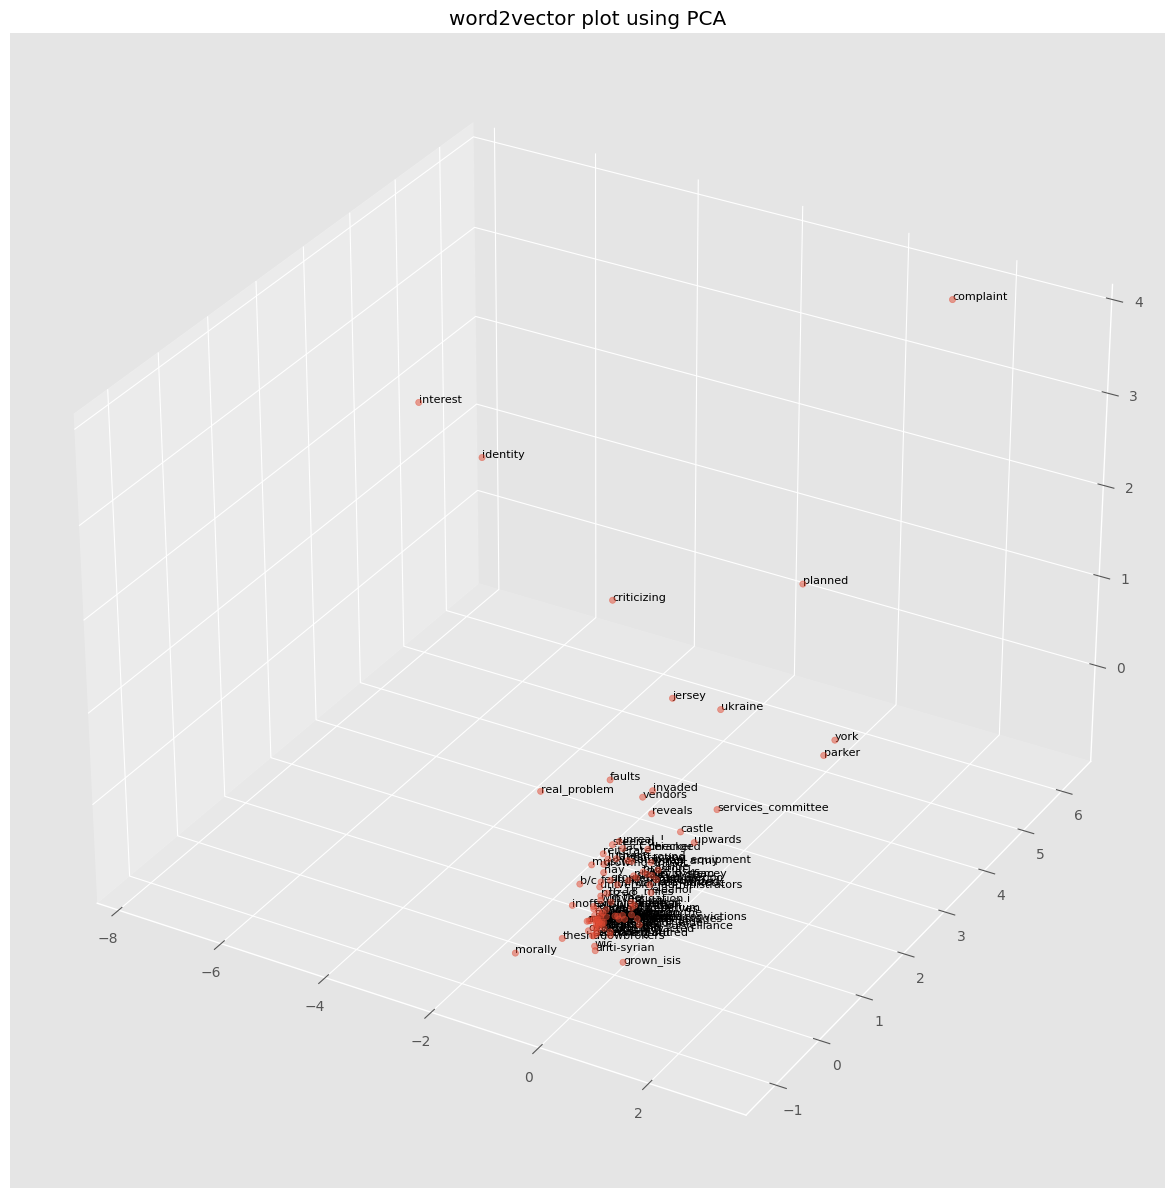

In [222]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ploting the sample above in a three-dimensional grid as scatter points using matplotlib

matplotlib.style.use('ggplot')
%matplotlib inline

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sample['x'], sample['y'], sample['z'], alpha = 0.5)

for word, row in sample.iterrows():
    x, y, z = row
    pos = (x, y, z)
    ax.text(x, y, z, s=word, size=8, zorder=1, color='k')
    
plt.title('word2vector plot using PCA')
plt.show()

## 6. Classification approach

### 6.1 Features and Labels
For the classifier we are using two features: the 'title' which in the dataframe is the representation of the article and the 'label' which is the feature that tells which articles are true or fake.

### 6.2 Classifier
For the classifier we are using supervised learning with a Naive Bayes algorithm due to its scalability and quickness. We started by setting the features above, then using CountVector - a feature extractor from the sklearn library - to fit the texts into the vector. Then we split the data into training and test set and created the Multinomial Naive Bayes model with the train data to train it. After training it we then tested on the test data and were able to get an accuracy of 94% with the prediction.

## Creating the model for the classifier

In [213]:
# Fake news classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Setting the features we are going to use to train our model
texts = data_copy['text'].values
labels = data_copy['label'].values

# Tokenize the texts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Adding the prediction to the dataframe so we can inspect better the results

results = data_copy.head(3300) # This is what we are going to be using from now on

results['prediction'] = y_pred;

# Let us drop the columns that we are not interested in at this point.
results.drop(columns=['clean_text', 'date'])

# Saving as CSV
results.to_csv('results.csv')

results.head(100)

/var/folders/65/v6ssklls6x5dnvkx1dq1vnjh0000gp/T/ipykernel_8404/906315854.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['prediction'] = y_pred;


,title,text,subject,date,label,clean_text,bigrams,prediction
9108,CHAIRMAN OF DEMS FOR TRUMP: My Party is Suffer...,We have to agree that the left is suffering fr...,politics,"Dec 27, 2017",False,"[we, have, to, agree, that, the, left, is, suf...","[we, have, to, agree, that, the, left, is, suf...",True
12861,NEW YORK TIMES Publishes Trump Tax Return From...,In a lame effort to score political points fo...,politics,"Oct 2, 2016",False,"[in, a, lame, effort, to, score, political, po...","[in, a, lame, effort, to, score_political, poi...",True
11216,"Puerto Rico holding call with creditors, to tw...",NEW YORK (Reuters) - Puerto Rico is talking to...,politicsNews,"January 15, 2016",True,"[new, york, (, reuters, ), -, puerto, rico, is...","[new_york, (, reuters, ), -, puerto_rico, is, ...",False
15398,[RAW VIDEO] WHAT JEB BUSH JUST TOLD A HISPANIC...,Bush spoke to a hispanic audience in central F...,politics,"Jul 29, 2015",False,"[bush, spoke, to, a, hispanic, audience, in, c...","[bush, spoke, to, a, hispanic, audience, in, c...",False
10270,BREAKING NEWS: Vladimir Putin Retaliates After...,Here s a question for the anti-Trump media: If...,politics,"Jul 30, 2017",False,"[here, s, a, question, for, the, anti-trump, m...","[here, s, a, question, for, the, anti-trump, m...",False
...,...,...,...,...,...,...,...,...
7896,Trump says Pence to represent him at Wisconsin...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"October 8, 2016",True,"[washington, (, reuters, ), -, u.s., republica...","[washington, (, reuters, ), -, u.s., republica...",False
2242,Ben Carson Got SMOKED By Samuel L. Jackson Fo...,"For at least one day, Donald Trump did not say...",News,"March 7, 2017",False,"[for, at, least, one, day, ,, donald, trump, d...","[for, at_least, one, day, ,, donald_trump, did...",False
17558,Kenya's Odinga says October poll would be illegal,LONDON (Reuters) - Kenya s opposition leader R...,worldnews,"October 13, 2017",True,"[london, (, reuters, ), -, kenya, s, oppositio...","[london, (, reuters, ), -, kenya, s, oppositio...",True
19409,Argentina's Macri almost certain to run for re...,BUENOS AIRES (Reuters) - Argentine President M...,worldnews,"September 21, 2017",True,"[buenos, aires, (, reuters, ), -, argentine, p...","[buenos_aires, (, reuters, ), -, argentine_pre...",True


# III. Conclusions

## 7. Evaluation

In [214]:
# Evaluating the accuracy of the model comparing the test and prediction data
import numpy as np

def calculate_accuracy(y_test, y_pred):
    accuracy = np.mean(y_pred == y_test)
    print(f'Accuracy: {accuracy:.2f}')

calculate_accuracy(y_test, y_pred)

Accuracy: 0.95


## 8. Summary and conclusions (finish)
### 8.1. Exploratory Data Analysis
During the exploratory data analysis phase we checked two informations about the dataset:
1. The categories (subjects) of the articles inside this dataset. The list of subjects is: 'left-news' 'politics' 'world news' 'politics news' 'news' 'middle-east', 'US News' 'government news'.

2. The different columns inside the dataset and their type. All of the columns have the object type and their names is: 'title', 'text', 'subject', 'date'. The fact that they are all objects made it hard for us to do any statistical analysis on top of that.

Some good ideas for extendind this project could be:
1. Checking which subjects of the above contain more fake news.
2. Checking what were that months of each year (column date) contain more fake news.

### 8.2. Lexical Analysis: Word2vec
As per the results of the lexical analysis using our Word2vec model we can see that we had a high accuracy in the results for the search of similar terms for all the words that were tested.

### 8.3. Classification Model
In terms of the classification model, even though we had a high accuracy (94%), by looking at the spreadsheet we can that
the accuracy from which the model was able to classify the true news was higher than for the fake news.
